## Environment setup

In [1]:
import numpy as np 
import pandas as pd 
import os
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle


## Load the data

In [2]:
df = pd.read_csv("../input/medical-speech-transcription-and-intent/Medical Speech, Transcription, and Intent/overview-of-recordings.csv")
print('Data shape: ',df.shape)

Data shape:  (6661, 13)


In [3]:
# dataset summary
df.describe()

,audio_clipping:confidence,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker:confidence,speaker_id,writer_id
count,6661.000000,6661.000000,6661.000000,6661.000000,6.661000e+03,6.661000e+03
mean,0.984625,0.854320,3.678268,0.984594,3.664962e+07,3.596655e+07
std,0.070909,0.165967,0.378536,0.069719,1.029919e+07,1.341818e+07
min,0.337800,0.336300,3.000000,0.342300,1.853182e+06,1.883056e+06
25%,1.000000,0.671100,3.330000,1.000000,3.482490e+07,3.498746e+07
50%,1.000000,1.000000,3.670000,1.000000,4.120334e+07,4.375503e+07
75%,1.000000,1.000000,4.000000,1.000000,4.385622e+07,4.411874e+07
max,1.000000,1.000000,5.000000,1.000000,4.444235e+07,4.434011e+07


In [4]:
# check sample of dataset
df.sample(2, random_state=42)

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
5265,no_clipping,1.0,no_noise,1.0,4.0,audible_speaker,1.0,28006404,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_28006404_28326999.wav,I feel joint pain every time I move,Joint pain,43985758
3315,no_clipping,1.0,no_noise,1.0,3.0,audible_speaker,1.0,43883861,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43883861_53191362.wav,I have a cut that has become red and oozes puss.,Infected wound,42082009


In [5]:
# check for missing values in dataset
df.isnull().sum()

audio_clipping                         0
audio_clipping:confidence              0
background_noise_audible               0
background_noise_audible:confidence    0
overall_quality_of_the_audio           0
quiet_speaker                          0
quiet_speaker:confidence               0
speaker_id                             0
file_download                          0
file_name                              0
phrase                                 0
prompt                                 0
writer_id                              0
dtype: int64

In [6]:
# check distribution of classes and look for imbalance classes
df['prompt'].value_counts()

Acne                  328
Shoulder pain         320
Joint pain            318
Infected wound        306
Knee pain             305
Cough                 293
Feeling dizzy         283
Muscle pain           282
Heart hurts           273
Ear ache              270
Hair falling out      264
Head ache             263
Feeling cold          263
Skin issue            262
Stomach ache          261
Back pain             259
Neck pain             251
Internal pain         248
Blurry vision         246
Body feels weak       241
Hard to breath        233
Emotional pain        231
Injury from sports    230
Foot ache             223
Open wound            208
Name: prompt, dtype: int64

## Train model

In [7]:
# split data to trainset and testset
# input is the text of symptoms and output is the disease

X = df['phrase']
y = df['prompt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# vectorize symptoms text and train SVM model
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [9]:
# make predictions
preds = pipe.predict(X_test)
print(classification_report(y_test,preds))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00        66
         Back pain       1.00      1.00      1.00        52
     Blurry vision       1.00      1.00      1.00        49
   Body feels weak       1.00      0.98      0.99        48
             Cough       1.00      1.00      1.00        59
          Ear ache       1.00      1.00      1.00        54
    Emotional pain       1.00      1.00      1.00        46
      Feeling cold       1.00      1.00      1.00        53
     Feeling dizzy       1.00      1.00      1.00        57
         Foot ache       1.00      1.00      1.00        44
  Hair falling out       0.98      1.00      0.99        53
    Hard to breath       1.00      1.00      1.00        47
         Head ache       1.00      1.00      1.00        53
       Heart hurts       1.00      1.00      1.00        55
    Infected wound       1.00      1.00      1.00        61
Injury from sports       1.00      1.00

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Acne'),
  Text(1, 0, 'Back pain'),
  Text(2, 0, 'Blurry vision'),
  Text(3, 0, 'Body feels weak'),
  Text(4, 0, 'Cough'),
  Text(5, 0, 'Ear ache'),
  Text(6, 0, 'Emotional pain'),
  Text(7, 0, 'Feeling cold'),
  Text(8, 0, 'Feeling dizzy'),
  Text(9, 0, 'Foot ache'),
  Text(10, 0, 'Hair falling out'),
  Text(11, 0, 'Hard to breath'),
  Text(12, 0, 'Head ache'),
  Text(13, 0, 'Heart hurts'),
  Text(14, 0, 'Infected wound'),
  Text(15, 0, 'Injury from sports'),
  Text(16, 0, 'Internal pain'),
  Text(17, 0, 'Joint pain'),
  Text(18, 0, 'Knee pain'),
  Text(19, 0, 'Muscle pain'),
  Text(20, 0, 'Neck pain'),
  Text(21, 0, 'Open wound'),
  Text(22, 0, 'Shoulder pain'),
  Text(23, 0, 'Skin issue'),
  Text(24, 0, 'Stomach ache')])

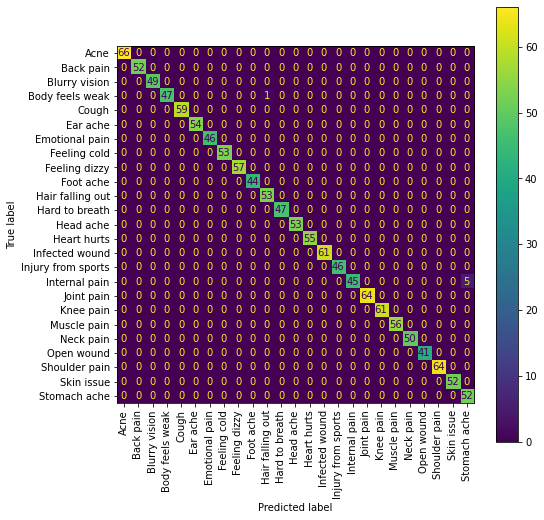

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(pipe, X_test, y_test, ax=ax)
plt.xticks(rotation=90)

In [11]:
# classify random text
pipe.predict(['I have a pain in my stomache'])

array(['Internal pain'], dtype=object)

In [12]:
# train model on the whole dataset
final_pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])
# Feed the training data through the pipeline
final_pipe.fit(X, y)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [13]:
# check the final model on random text
data = np.array(['i was playing vollyball and now my knee hurts so bad', 'i feel funny in my stomach'])
ser = pd.Series(data)
preds = final_pipe.predict(ser)
preds

array(['Knee pain', 'Stomach ache'], dtype=object)

In [14]:
# Save the Modle to file in the current working directory

Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(final_pipe, file)

In [15]:
# Load the Model back from file

with open(Pkl_Filename, 'rb') as file:  
    my_model = pickle.load(file)

my_model

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [16]:
# make prediction on random text
my_model.predict(ser)

array(['Knee pain', 'Stomach ache'], dtype=object)